In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [28]:
def input_dataset():
    dataset= datasets.load_breast_cancer() # Dataset normalized with Standard Deviation Scaler
    features= dataset['feature_names']
    final_dataset= pd.DataFrame(dataset['data'], columns=[features])
    final_dataset= final_dataset.assign(target= dataset['target'])
    return final_dataset

In [29]:
final_dataset= input_dataset()
final_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [30]:
# final_dataset= final_dataset.iloc[:,:2]

In [31]:
final_dataset.columns.values

array([('mean radius',), ('mean texture',), ('mean perimeter',),
       ('mean area',), ('mean smoothness',), ('mean compactness',),
       ('mean concavity',), ('mean concave points',), ('mean symmetry',),
       ('mean fractal dimension',), ('radius error',), ('texture error',),
       ('perimeter error',), ('area error',), ('smoothness error',),
       ('compactness error',), ('concavity error',),
       ('concave points error',), ('symmetry error',),
       ('fractal dimension error',), ('worst radius',),
       ('worst texture',), ('worst perimeter',), ('worst area',),
       ('worst smoothness',), ('worst compactness',),
       ('worst concavity',), ('worst concave points',),
       ('worst symmetry',), ('worst fractal dimension',), ('target',)],
      dtype=object)

In [32]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

In [33]:
X_train, X_test, y_train, y_test= train_test_split(final_dataset.iloc[:, :-1]
                                                   ,final_dataset.iloc[:, -1], test_size= 0.3)

In [34]:
# Sigmoid function
val= np.arange(-10, 10 , .01)
z = 1 / ( 1+ np.exp(- val))

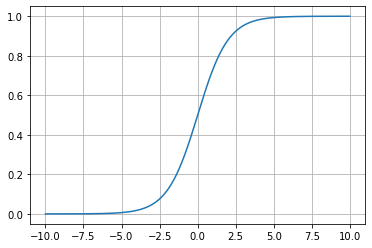

In [35]:
plt.plot(val, z)
plt.grid()
plt.show()

<strong>Linear Logistic Regression hypothesis:</strong>
<h2>
    <p style="color:red">
    h( <font face= "Symbol">q</font><sup>T</sup>x)= g (<font face= "Symbol">q</font><sup>T</sup>x)= <sup>1</sup>&frasl;<sub> 1 + e<sup> -<font face= "Symbol">q</font><sup>T</sup>x</sup></sub>
    </p>
</h2>

In [36]:
# Sigmoid fucntion
def sigmoid(X):
    '''
    This function is h_theta_x (prediction) that we use sigmoid(regression) formula.
    The formula is 1 / (1 + e ** -(X_train or X_test @ theta ))
    After finding theta's, we can use this function for predict for X_test too.
    ----------
    Parameter:
    X: X_train or X_test @ theta
    -----------
    return:
    this function return value of sigmoid function (h_x)... 
    '''
    pred= 1 / (1 + np.exp(-X))
    return pred

<strong>Linear Logistic Regression Loss function:</strong>
<h2>
    <p style="color:red">
        J(<font face="Symbol">q</font>)=<sup>1</sup>&frasl;<sub>m</sub>&sum;<sup>m</sup><sub>i=1</sub>[ -y<sup>i</sup>log<sup>h<sub><font face="Symbol">q</font></sub>(x<sup>i</sup>)</sup> - ( 1 - y<sup>i</sup>)log<sup>(1 - h<font face="Symbol">q</font>(x<sup>i</sup>))</sup>]
    </p>
</h2>

In [37]:
def cost_function(X_train, y_train, theta):
    '''
    In this fucntion we calcualate cost function. We must check converge with drawing cost function.
    If it was upwards, it means that divergence has occurred.
    If it is down, it must remain constant for a while.
    va age be samte paein bud, nabayad kheyli tiz bashad  dar in surat bayad meghdare alpha ro down konim.(persian :))
    ---------------------------
    parameters:
    X_train, y_train, theta
    ---------------------------
    return:
    value of Loss function (J_theta)... 1 * 1 matrix
    '''
    m= X_train.shape[0]
    cost= (-1/m) * (y_train.T @ np.log(sigmoid(X_train @ theta)) + (1 - y_train.T) @ np.log(1 - sigmoid(X_train @ theta)))
    return cost[0][0]

<strong>
    Derivative of Cost Function for Logistic Regression:
</strong>
<h2>
    <p style="color:red">
        <sup>dJ<sub><font face="Symbol">q</font></sub>(x)</sup>&frasl;<sub>d<font face="Symbol">q</font></sub> = <sup>1</sup>&frasl;<sub>m</sub> x<sup>T</sup> (h<sub><font face="Symbol">q</font></sub>(x) - y)
    </p>
</h2>


In [38]:
def cost_func_derivative(X_train, y_train, theta):
    '''
    Derivative of Cost Function for Logistic Regression:
    dJ_theta(x)⁄dtheta = 1⁄m * x.T (h_theta(x) - y)
    '''
    m= X_train.shape[0]
    deff= X_train.T @ (sigmoid(X_train @ theta) - y_train)
    
    return deff
    

In [39]:
def fit(X_train, y_train, learning_rate= .003, max_iter= 1500):
    '''
    In this function we want to find optimized theta values with Gradient descent.
    Before everything, we add intercept(1) to X_train matrix then we set random values to theta.
    ---------------------
    Parameters:
    X_train: maxtirx of features that we want to learn to computer
    y_train: value of target 
    learning_rate: steps .. please use optimized value to learning rate for faster learning and Prevent divergence.
    max_iter: number of times that we want run gradient descent.
    ---------------------
    Return:
    This function return optimized value for theta vector and cost function
    '''
    X_train= np.insert(X_train, 0, 1, axis= 1) # add new col in X_train[:, 0] value is 1
    num_of_features= X_train.shape[1]
    m=  X_train.shape[0]
    cost_value= []
    theta_value= []
    theta= np.random.rand(num_of_features, 1)
    for i in range(max_iter):
#         print(i)
        cost= cost_function(X_train, y_train.reshape(len(X_train), 1), theta)
        cost_value.append(cost)
#         print(cost)
#         print('\n-----cost ended--------\n')
        theta= theta - (learning_rate * (1 / m)) * cost_func_derivative(X_train, y_train.reshape(len(X_train), 1), theta)
        cost_value.append(cost)
        theta_value.append(theta)
#         print(theta_value)
#         print('\n------theta ended------\n')
    return theta_value, cost_value

In [40]:
def scaler(X):
    X_scaled= StandardScaler().fit_transform(X)
    return X_scaled

In [41]:
t1= time.time()
X_train_std= scaler(X_train)
theta_value, cost_value= fit(X_train_std, y_train.values)
print(time.time()- t1)

c:\users\mohammad\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


0.8759944438934326


In [42]:
theta= theta_value[-1]

In [43]:
costt= np.array(cost_value)

In [44]:
costt

array([       inf,        inf,        inf, ..., 0.16901449, 0.16895192,
       0.16895192])

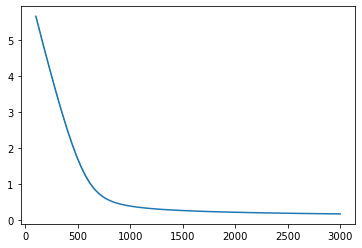

In [45]:
plt.plot(costt)
plt.show()

In [46]:
def predict(X_test, theta):
    '''
    This function return prediction values for X_test. 
    --------------------
    Parameters:
    X_test: The dataset on which we want to run the regression logistics algorithm.
    theta: FINAL value for theta.
    --------------------
    return:
    Return prediction Matrix about X_test it is 0 / 1. and returned matrix size is (m,) that m is number of X_test row.
    '''
    X_test.insert(loc= 0, column= "theta0", value= 1)
    X_test_std= scaler(X_test)
    predict_proba= sigmoid(X_test_std @ theta)
    norm_pred= np.where(predict_proba < .5, 0, 1) # 0 if pred < .5 else 1
    
    return norm_pred.ravel()

In [47]:
y_pred= predict(X_test, theta)

In [48]:
y_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [49]:
y_test.values

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [50]:
print('Your accuracy is {} %'.format(accuracy_score(y_test.values, y_pred) * 100))

Your accuracy is 95.90643274853801 %


In [51]:
def accuracy(y_pred, y_test):
    '''
    The accuracy formula is: number_of_corect_prediction / number_of_all_test_set_sample
    '''
    correct_predict_count= np.equal(y_pred, y_test).sum()
    return correct_predict_count / len(y_test)

In [52]:
print('Your accuracy is {:.2f} %'.format(accuracy(y_pred, y_test.values) * 100))

Your accuracy is 95.91 %
